In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk


In [2]:
%matplotlib inline

In [3]:
train_df = pd.read_csv("C:/Users/GQPF6681/Desktop/twitter_sentiment/train.csv")
test_df = pd.read_csv("C:/Users/GQPF6681/Desktop/twitter_sentiment/test.csv")

In [4]:
train_df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
train_df.label.value_counts() # 0 : negative 
                              # 1 : positive

0    29720
1     2242
Name: label, dtype: int64

In [6]:
train_df[train_df.label == 1].head(10)  #print first 10 tweets having positive sentiment 

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [7]:
train_df[train_df.label == 1].tail(10) #print last 10 tweets having positive sentiment 

,id,label,tweet
31912,31913,1,i couldn't end #2016 without mentioning #trump...
31926,31927,1,a follow up from the gentlemen who were kicked...
31929,31930,1,did keep #colinpowell and #condoleezzarice fr...
31930,31931,1,@user #feminismiscancer #feminismisterrorism #...
31933,31934,1,@user judd is a &amp; #homophobic #freemilo #...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
train_df['pre_clean_len'] = [len(t) for t in train_df.tweet] #sanity-check

In [9]:
# building data dictionary 
from pprint import pprint
data_dict = {
    'label':{
        'type':train_df.label.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'tweet':{
        'type':train_df.tweet.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':train_df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':train_df.shape
}
pprint(data_dict)

{'dataset_shape': (31962, 4),
 'label': {'description': 'sentiment class - 0:negative, 1:positive',
           'type': dtype('int64')},
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'tweet': {'description': 'tweet text', 'type': dtype('O')}}


In [10]:
train_df[train_df.pre_clean_len > 280].head(10)  # checking if there are any tweets more than 280 characters 

,id,label,tweet,pre_clean_len


In [11]:
import re #working with regex for pattern checking 

In [12]:
# remove @user twitter handles from single tweet 

re.sub(r'@[A-Za-z0-9]+','',train_df.tweet[0])

'  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [13]:
# remove url links 
# re.sub('https?://[A-Za-z0-9./]+','',train_df.tweet[609])
# not required here as there is no tweet with links

In [14]:
# remove hashtags(#) only without removing the text from a single tweet 
# we remove all the non-letter characters including numbers 

re.sub("[^a-zA-Z]", " ", train_df.tweet[0])

'  user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction     run'

In [15]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

patt1 = r'@[A-Za-z0-9]+'
patt2 = r'https?://[A-Za-z0-9./]+'
combined_patt = r'|'.join((patt1, patt2))

def tweet_cleaner(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet) 
    lower_case_letters = letters_only.lower()
    
    words = tok.tokenize(lower_case_letters) #letters_only operation will create unnecessary white spaces
                                             # thus tokenization 
    return (" ".join(words)).split() # after tokenization joining the words to remove the unncessary white spaces 



In [16]:
#we will remove the @user twitter handles, punctuation, stopwords etc  from both train and test data 
#that's why we append teest data with train data 

combi_df = train_df.append(test_df, ignore_index=True)
combi= combi_df.tweet[0:]
combi

c:\users\gqpf6681\appdata\local\programs\python\python35\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
5        [2/2] huge fan fare and big talking before the...
6         @user camping tomorrow @user @user @user @use...
7        the next school year is the year for exams.ð...
8        we won!!! love the land!!! #allin #cavs #champ...
9         @user @user welcome here !  i'm   it's so #gr...
10        â #ireland consumer price index (mom) climb...
11       we are so selfish. #orlando #standwithorlando ...
12       i get to see my daddy today!!   #80days #getti...
13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
15       ouch...junior is angryð#got7 #junior #yugyo...
16       i am thankful for having a paner. #thankful #p.

In [17]:
#remove stopwords
# here removing those words which have length less than 3
combi = combi.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) 
combi

0        @user when father dysfunctional selfish drags ...
1        @user @user thanks #lyft credit can't cause th...
2                                      bihday your majesty
3        #model love take with time urð±!!! ððð...
4                          factsguide: society #motivation
5        [2/2] huge fare talking before they leave. cha...
6        @user camping tomorrow @user @user @user @user...
7        next school year year exams.ð¯ can't think a...
8        won!!! love land!!! #allin #cavs #champions #c...
9                       @user @user welcome here it's #gr8
10       #ireland consumer price index (mom) climbed fr...
11       selfish. #orlando #standwithorlando #pulseshoo...
12                       daddy today!! #80days #gettingfed
13       @user #cnn calls #michigan middle school 'buil...
14       comment! #australia #opkillingbay #seashepherd...
15       ouch...junior angryð#got7 #junior #yugyoem ...
16              thankful having paner. #thankful #positi

In [95]:
#removing the @user twitter handles 

combi = combi.str.replace("@[\w]*", "")
combi

0         when father dysfunctional selfish drags kids ...
1          thanks #lyft credit can't cause they don't o...
2                                      bihday your majesty
3        #model love take with time urð±!!! ððð...
4                          factsguide: society #motivation
5        [2/2] huge fare talking before they leave. cha...
6                         camping tomorrow        dannyâ¦
7        next school year year exams.ð¯ can't think a...
8        won!!! love land!!! #allin #cavs #champions #c...
9                                   welcome here it's #gr8
10       #ireland consumer price index (mom) climbed fr...
11       selfish. #orlando #standwithorlando #pulseshoo...
12                       daddy today!! #80days #gettingfed
13        #cnn calls #michigan middle school 'build wal...
14       comment! #australia #opkillingbay #seashepherd...
15       ouch...junior angryð#got7 #junior #yugyoem ...
16              thankful having paner. #thankful #positi

In [18]:
combi_result = []

for t in combi:
    combi_result.append(tweet_cleaner(t))
combi_result

[['user',
  'when',
  'father',
  'dysfunctional',
  'selfish',
  'drags',
  'kids',
  'into',
  'dysfunction',
  'run'],
 ['user',
  'user',
  'thanks',
  'lyft',
  'credit',
  'can',
  't',
  'cause',
  'they',
  'don',
  't',
  'offer',
  'wheelchair',
  'vans',
  'pdx',
  'disapointed',
  'getthanked'],
 ['bihday', 'your', 'majesty'],
 ['model', 'love', 'take', 'with', 'time', 'ur'],
 ['factsguide', 'society', 'motivation'],
 ['huge',
  'fare',
  'talking',
  'before',
  'they',
  'leave',
  'chaos',
  'disputes',
  'when',
  'they',
  'there',
  'allshowandnogo'],
 ['user',
  'camping',
  'tomorrow',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'danny'],
 ['next',
  'school',
  'year',
  'year',
  'exams',
  'can',
  't',
  'think',
  'about',
  'that',
  'school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['won',
  'love',
  'land',
  'allin',
  'cavs',
  'champions',
  'cleveland',
  'clevelandcavaliers'],
 ['u

In [65]:
#stemming - converting the words into root word - NOT WORKING
#Porter stemmer 

from nltk.stem.porter import *
stemmer = PorterStemmer()

combi_stemmed = combi.apply(lambda x: [stemmer.stem(i) for i in x]) 
combi_stemmed

0        [@, u, s, e, r,  , w, h, e, n,  , f, a, t, h, ...
1        [@, u, s, e, r,  , @, u, s, e, r,  , t, h, a, ...
2        [b, i, h, d, a, y,  , y, o, u, r,  , m, a, j, ...
3        [#, m, o, d, e, l,  , l, o, v, e,  , t, a, k, ...
4        [f, a, c, t, s, g, u, i, d, e, :,  , s, o, c, ...
5        [[, 2, /, 2, ],  , h, u, g, e,  , f, a, r, e, ...
6        [@, u, s, e, r,  , c, a, m, p, i, n, g,  , t, ...
7        [n, e, x, t,  , s, c, h, o, o, l,  , y, e, a, ...
8        [w, o, n, !, !, !,  , l, o, v, e,  , l, a, n, ...
9        [@, u, s, e, r,  , @, u, s, e, r,  , w, e, l, ...
10       [#, i, r, e, l, a, n, d,  , c, o, n, s, u, m, ...
11       [s, e, l, f, i, s, h, .,  , #, o, r, l, a, n, ...
12       [d, a, d, d, y,  , t, o, d, a, y, !, !,  , #, ...
13       [@, u, s, e, r,  , #, c, n, n,  , c, a, l, l, ...
14       [c, o, m, m, e, n, t, !,  , #, a, u, s, t, r, ...
15       [o, u, c, h, ., ., ., j, u, n, i, o, r,  , a, ...
16       [t, h, a, n, k, f, u, l,  , h, a, v, i, n, g, .

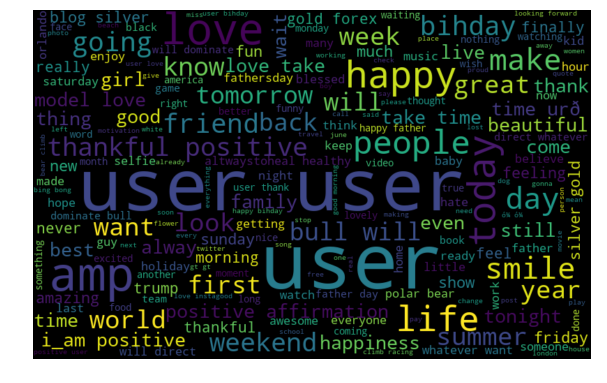

In [19]:
# creating wordcloud using all the words for visualization of the kind of words used in tweets

all_words = ' '.join([text for text in combi])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") #interpolation is scaling the image #bilinear is one type
plt.axis('off')
plt.show()

In [28]:
combi_df[combi_df.label == 1].head(10)

,id,label,pre_clean_len,tweet
13,14,1.0,74.0,@user #cnn calls #michigan middle school 'buil...
14,15,1.0,101.0,no comment! in #australia #opkillingbay #se...
17,18,1.0,22.0,retweet if you agree!
23,24,1.0,47.0,@user @user lumpy says i am a . prove it lumpy.
34,35,1.0,104.0,it's unbelievable that in the 21st century we'...
56,57,1.0,39.0,@user lets fight against #love #peace
68,69,1.0,110.0,ð©the white establishment can't have blk fol...
77,78,1.0,87.0,"@user hey, white people: you can call people '..."
82,83,1.0,77.0,how the #altright uses &amp; insecurity to lu...
111,112,1.0,129.0,@user i'm not interested in a #linguistics tha...
